In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from time import time
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


from context import predicate_search
from predicate_search import PredicateInduction, RobustNormal, Density, BottomUp, Predicate

In [2]:
data = pd.read_csv('../data/intel_sensor_s3.csv')
data.datetime = pd.to_datetime(data.datetime)
data = data.drop('epoch', axis=1)
data = data.rename(columns={'datetime': 'dtime'})

In [3]:
disc_cols = ['moteid']

In [4]:
refit = False

In [5]:
if refit:
    predicate_induction = PredicateInduction(data, disc_cols)
    with open('intel_sensor_s3_pixal.pkl', 'wb') as f:
        pickle.dump(predicate_induction, f)
else:
    with open('intel_sensor_s3_pixal.pkl', 'rb') as f:
        predicate_induction = pickle.load(f)

In [6]:
distances = predicate_induction.model.distance(predicate_induction.norm_data[['temperature']])

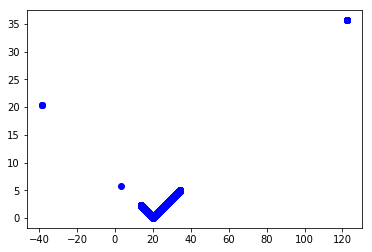

In [7]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo');

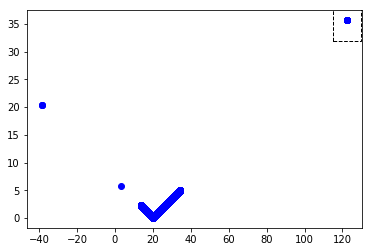

In [8]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo')
rect = plt.Rectangle((115, 32), 15, 10, fill=False, facecolor='none', linestyle='--')
ax.add_patch(rect)

In [9]:
index1 = list(data[data.temperature > 122].index)
p1 = predicate_induction.find_predicates(targets=['temperature'], c=.8, quantile=.25, index=index1, maxiters=2,
                                         topn=5)

iter: 0
merging
voltage in [72]: 1174.948887235101 voltage in [71, 72]: 1214.8680418424083
voltage in [71, 72]: 1214.8680418424083 voltage in [71, 72, 73]: 580.1073932998706
humidity in [96]: 1022.8524156267055 humidity in [95, 96]: 962.8241637788224
humidity in [96]: 1022.8524156267055 humidity in [96, 97]: -17.007620361944845

merged:
temperature in [99] 1289.2823787623581
voltage in [71, 72] 1214.8680418424083
humidity in [96] 1022.8524156267055
humidity in [95] 519.5675576667295
voltage in [73] 188.63907573851498
moteid in [15] 42.457434829007404
dtime in [82] 21.071022013881873
light in [99] -2.3808266247442864
dtime in [90] -8.458787449600203
dtime in [81] -11.0341273633159
humidity in [97] -17.648511176845723

intersected:
moteid in [15] and dtime in [82] 1266.3811393009962
voltage in [73] and dtime in [82] 982.6139829571109
voltage in [73] and light in [99] 982.6139829571109
voltage in [73] and humidity in [97] 959.7374361774603
humidity in [95] and moteid in [15] 727.344965757

In [24]:
for p in p1:
    print(p, '\n')

moteid in [15] and ((dtime >= '2004-03-02 06:43:24.354086363' and dtime <= '2004-03-02 23:59:59.543254')) 

((temperature >= 122.15299999999999 and temperature <= 122.15299999999999)) 

((voltage >= 2.2707543757575754 and voltage <= 2.3342112060606057)) 

((humidity >= -2.0027636363636248 and humidity <= 17.294290909090932)) 

((voltage >= 0.0180369 and voltage <= 2.3659396212121213)) and ((dtime >= '2004-03-02 07:40:59.642373454' and dtime <= '2004-03-02 23:59:59.543254')) 



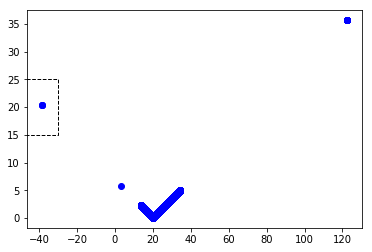

In [30]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo')
rect = plt.Rectangle((-50, 15), 20, 10, fill=False, facecolor='none', linestyle='--')
ax.add_patch(rect)

In [31]:
index2 = list(data[data.temperature < -20].index)
p2 = predicate_induction.find_predicates(targets=['temperature'], c=.8, quantile=.25, index=index2, maxiters=2,
                                         topn=5)

iter: 0
merging
voltage in [75]: -6.273045228284527 voltage in [75, 76]: -9.480137352135657

merged:
humidity in [95] 519.5675576667295
temperature in [0] 255.98892951507787
voltage in [75] -6.273045228284527
voltage in [76] -9.437970932070472
light in [47] -9.957624826597351
dtime in [14] -10.234244836162459
light in [33] -10.388409527606123
light in [30] -10.560222274620743
dtime in [15] -11.826060813386539
moteid in [20] -15.044811772085122

intersected:
voltage in [76] and moteid in [20] 236.04941715770315
voltage in [75] and dtime in [15] 205.49295307241846
voltage in [75] and moteid in [20] 205.49295307241846
voltage in [76] and dtime in [14] 205.49295307241846
voltage in [76] and dtime in [15] 205.49295307241846
voltage in [76] and light in [47] 83.56691684576565
voltage in [75] and light in [30] 65.77924348379324
voltage in [76] and light in [33] 20.1882984914147
light in [33] and moteid in [20] 6.175022524182486
light in [30] and moteid in [20] 5.923110391915271
dtime in [15] 

In [32]:
for p in p2:
    print(p, '\n')

((humidity >= -21.299818181818182 and humidity <= -2.0027636363636248)) 

((voltage >= 0.0180369 and voltage <= 2.4611248666666667)) and moteid in [20] 

((voltage >= 0.0180369 and voltage <= 2.4611248666666667)) and ((dtime >= '2004-02-28 14:25:00.038851272' and dtime <= '2004-02-28 16:20:10.615425454')) 

((temperature >= -38.4 and temperature <= -36.778252525252526)) 

((voltage >= 2.429396451515151 and voltage <= 2.4611248666666667)) and ((light >= 877.029494949495 and light <= 895.6896969696969)) 

